In [67]:
from IPython.core.display import display, HTML

display(HTML("<style>.container { width:100% !important; }</style>")) # Increase cell width
display(HTML("<style>.rendered_html { font-size: 16px; }</style>")) # Increase font size

import warnings
warnings.filterwarnings('ignore')

import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline  
plt.style.use("seaborn")

In [68]:
import pandas as pd
import numpy as np

# Introduction to SVM

In this practice we are going to apply SVM to synthetic data to understand its operation and the impact of its parameters.

## Data Generation

We generate some data belonging to two classes linearly separable.

In [69]:
n = 1500          # number of data points
p = 2             # dimension
sigma = 1         # variance of the distribution
meanpos = 0       # centre of the distribution of positive examples
meanneg = 3       # centre of the distribution of negative examples
npos = round(n/2) # number of positive examples
nneg = n-npos     # number of negative examples

# Generate the positive and negative examples
Xpositive = np.random.normal(meanpos,sigma,(npos,p))
Xnegative = np.random.normal(meanneg,sigma,(npos,p))

x = np.vstack((Xpositive,Xnegative))  # np.vstack like pd.concat(axis=0)

# Generate the labels
y = np.vstack((np.array([1]*npos).reshape(-1,1), np.array([0]*nneg).reshape(-1,1)))

## Data Visualization

Let's visualize the data

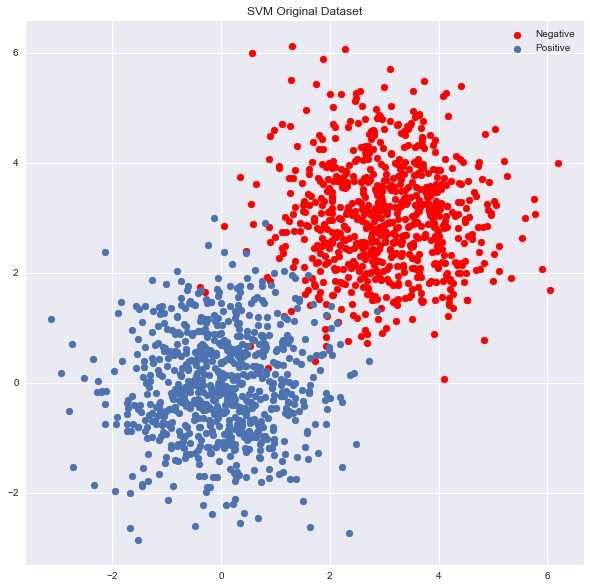

In [70]:
plt.figure(figsize=(10,10))
plt.title("SVM Original Dataset")
plt.scatter(Xnegative[:,0], Xnegative[:,1], color="red", label="Negative")
plt.scatter(Xpositive[:,0], Xpositive[:,1], label="Positive")
plt.legend();

## Train Test Splitting

For the later evaluation we split the dataset (80% for training (o) and 20% for test (x)).

Will plot the data according to the following colormap palette: plt.cm.RdBu (Red to Blue)

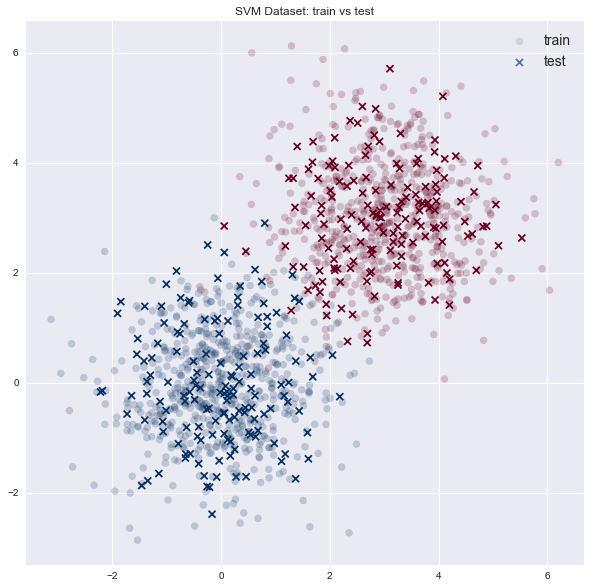

In [71]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

fig, ax = plt.subplots(figsize=(10, 10))
ax.set_title("SVM Dataset: train vs test")
ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, label="train", alpha=0.2, cmap=plt.cm.RdBu)  # TRAIN
ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, label="test", marker="x", cmap=plt.cm.RdBu)  # TEST
ax.legend(fontsize=14);

## SVM

We will make use of the `SVM` package (https://scikit-learn.org/stable/modules/svm.html) in the `sklearn` to train a SVM classifier on the generated data. 

There are two important parameters:
 - C that controls the penalty of wrongly categorize datapoints depending on their distance from the separating hyperplane. As we explained in class, selecting a proper C vaule is crucial to the generalizability of the SVM. In this example code, it´s set to 1.

 - The other parameter is the kernel applied. For this example, we use a linear kernel.


In [72]:
from sklearn import svm

C = 1  # regularization parameter: 1 by default

clf = svm.SVC(C=C, kernel='linear')
clf.fit(X_train, y_train)

SVC(C=1, kernel='linear')

Let's create a function to plot the hyperplane, the support vectors, and the margins

In [53]:
def plot_svm_decision(X_train, y_train, clf):
    
    fig, ax = plt.subplots(figsize=(10, 10))
    
    # plot the training data
    ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train[:,0], cmap=plt.cm.RdBu, alpha=0.3)
    
    # plot the decision function
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()

    # create grid to evaluate model
    xx = np.linspace(xlim[0], xlim[1], 30)  # 30 points between xlim[0] and xlim[1]
    yy = np.linspace(ylim[0], ylim[1], 30)
    YY, XX = np.meshgrid(yy, xx)
    xy = np.vstack([XX.ravel(), YY.ravel()]).T
    Z = clf.decision_function(xy).reshape(XX.shape)

    # plot decision boundary and margins
    ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1],
               linestyles=['--', '-', '--'])
    
    # plot support vectors
    # this function not only plots the observations on which the margins lie, 
    # but also all those observations that fall outside their class' region:
    ax.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=100,
               linewidth=1, facecolors='none', edgecolors='k', alpha=0.9)
    plt.show()

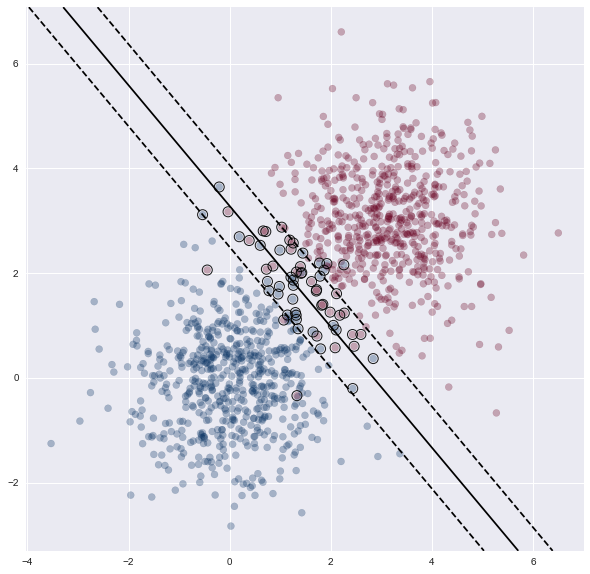

[30 31]


In [35]:
plot_svm_decision(X_train, y_train, clf)
print(clf.n_support_)

Accuracy = 0.98


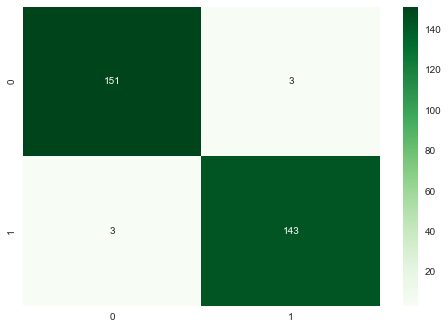

In [36]:
from sklearn.metrics import confusion_matrix, accuracy_score
import seaborn as sns

# Predict labels on test
predictions = clf.predict(X_test)

print("Accuracy = {}".format(accuracy_score(y_test, predictions)))
cm = confusion_matrix(y_test, predictions, labels=[0,1])
sns.heatmap(cm, annot=True, fmt="g", cmap=plt.cm.Greens)

An almost perfect classifier as we expected.

# RBF Kernel (FUNDAMENTAL)

Based on the previous code, we test a non-linear kernel and plot the decision boundary. (Take a look to the RBF kernel: https://scikit-learn.org/stable/modules/svm.html#kernel-functions)


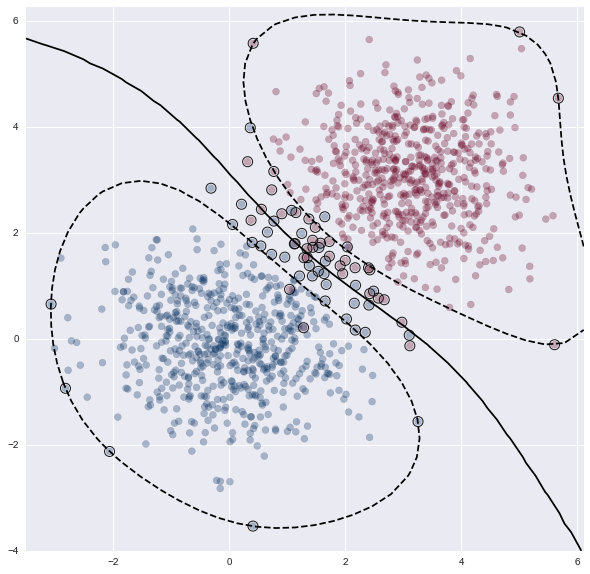

[35 37]


In [54]:
C = 1  # regularization parameter: 1 by default

rbf_svc = svm.SVC(kernel='rbf', C=C)
rbf_svc.fit(X_train, y_train)

def plot_svm_decision(X_train, y_train, rbf_svc):
    
    fig, ax = plt.subplots(figsize=(10, 10))
    
    # plot the training data
    ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train[:,0], cmap=plt.cm.RdBu, alpha=0.3)
    
    # plot the decision function
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()

    # create grid to evaluate model
    xx = np.linspace(xlim[0], xlim[1], 30)  # 30 points between xlim[0] and xlim[1]
    yy = np.linspace(ylim[0], ylim[1], 30)
    YY, XX = np.meshgrid(yy, xx)
    xy = np.vstack([XX.ravel(), YY.ravel()]).T
    Z = rbf_svc.decision_function(xy).reshape(XX.shape)

    # plot decision boundary and margins
    ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1],
               linestyles=['--', '-', '--'])
    
    # plot support vectors
    # this function not only plots the observations on which the margins lie, 
    # but also all those observations that fall outside their class' region:
    ax.scatter(rbf_svc.support_vectors_[:, 0], rbf_svc.support_vectors_[:, 1], s=100,
               linewidth=1, facecolors='none', edgecolors='k', alpha=0.9)
    plt.show()
    
plot_svm_decision(X_train, y_train, rbf_svc)
print(rbf_svc.n_support_)

Accuracy = 0.9766666666666667


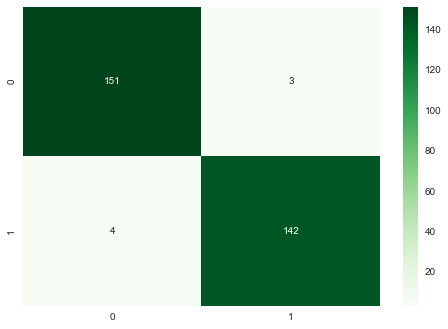

In [55]:
# Predict labels on test
# Predict labels on test
predictions = rbf_svc.predict(X_test)

print("Accuracy = {}".format(accuracy_score(y_test, predictions)))
cm = confusion_matrix(y_test, predictions, labels=[0,1])
sns.heatmap(cm, annot=True, fmt="g", cmap=plt.cm.Greens)


# Regularization (FUNDAMENTAL)

Playing with different values of `C` and explain how they affect to the decision boundary. Go big or go home! try super small values (like 0.0000001) and super big values (like 10000000)

A low C makes the model prone to underfitting, whereas a high C classifies all the datapoints perfectly thus an example of overfitting. 

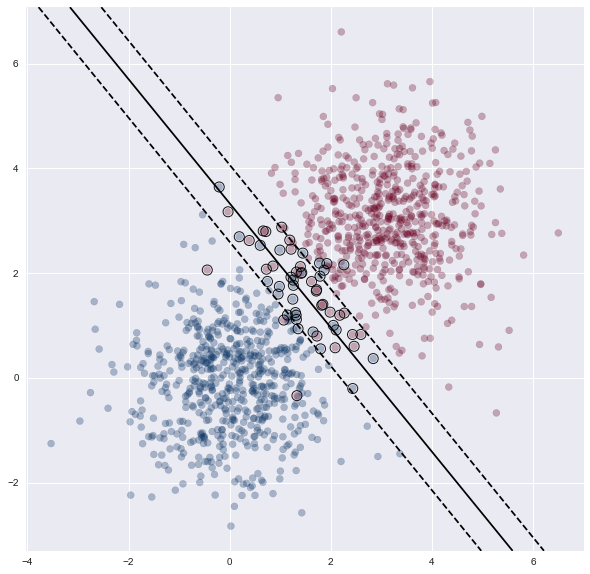

[28 29]


In [38]:
C = 100000 # regularization parameter: 1 by default

rbf_svc = svm.SVC(kernel='linear', C=C)
rbf_svc.fit(X_train, y_train)

def plot_svm_decision(X_train, y_train, clf):
    
    fig, ax = plt.subplots(figsize=(10, 10))
    
    # plot the training data
    ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train[:,0], cmap=plt.cm.RdBu, alpha=0.3)
    
    # plot the decision function
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()

    # create grid to evaluate model
    xx = np.linspace(xlim[0], xlim[1], 30)  # 30 points between xlim[0] and xlim[1]
    yy = np.linspace(ylim[0], ylim[1], 30)
    YY, XX = np.meshgrid(yy, xx)
    xy = np.vstack([XX.ravel(), YY.ravel()]).T
    Z = rbf_svc.decision_function(xy).reshape(XX.shape)

    # plot decision boundary and margins
    ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1],
               linestyles=['--', '-', '--'])
    
    # plot support vectors
    # this function not only plots the observations on which the margins lie, 
    # but also all those observations that fall outside their class' region:
    ax.scatter(rbf_svc.support_vectors_[:, 0], rbf_svc.support_vectors_[:, 1], s=100,
               linewidth=1, facecolors='none', edgecolors='k', alpha=0.9)
    plt.show()
    
plot_svm_decision(X_train, y_train, rbf_svc)
print(rbf_svc.n_support_)

Accuracy = 0.98


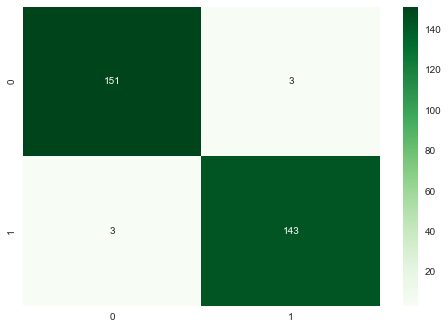

In [39]:
# Predict labels on test
predictions = clf.predict(X_test)

print("Accuracy = {}".format(accuracy_score(y_test, predictions)))
cm = confusion_matrix(y_test, predictions, labels=[0,1])
sns.heatmap(cm, annot=True, fmt="g", cmap=plt.cm.Greens)

# Polynomial Kernel (OPTIONAL)

We have played with linearly separable data. Let's see now how SVM behaves for non-linearly separable data. To that end we load the "spiral data", where each color belongs to one class.

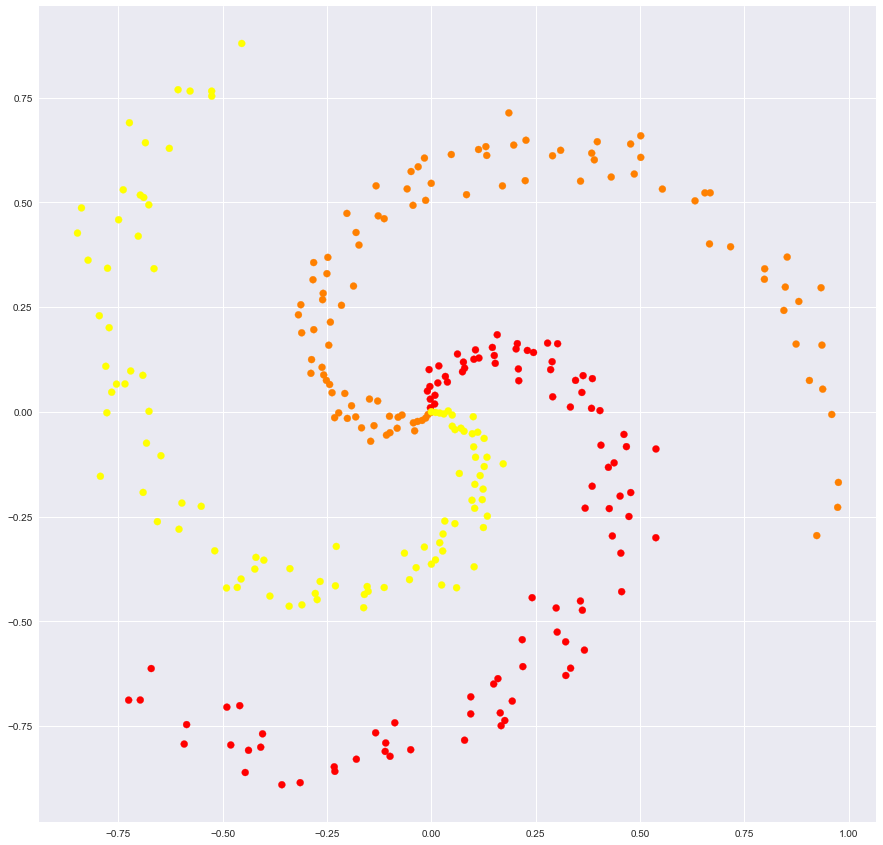

In [40]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

plt.figure(figsize=(15,15))
plt.scatter(train.X, train.Y, c=train.Label, cmap=plt.cm.autumn);

The following code train a SVM model with a polynomial kernel and plot the classification boundary


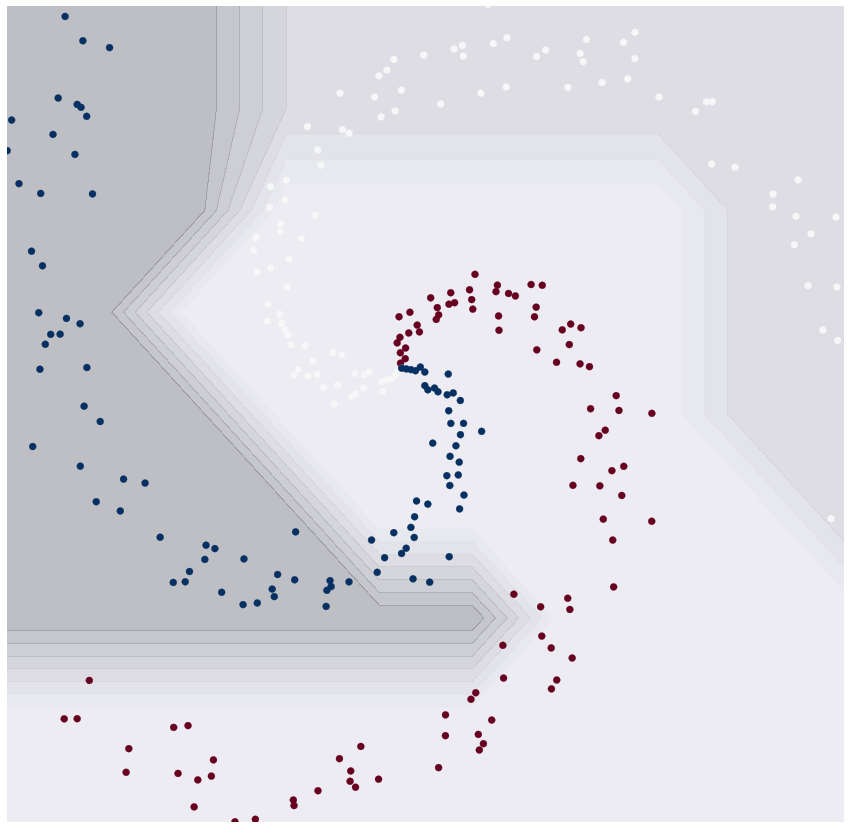

In [41]:
degree = 5

def svm_polynomial_kernel(degree=degree):

    clf = svm.SVC(degree=degree, kernel='poly')
    clf.fit(train.iloc[:,1:3], train.Label)

    plt.figure(figsize=(15,15))

    # create a mesh to plot in
    x_min, x_max = train.iloc[:, 1].min(), train.iloc[:, 1].max()
    y_min, y_max = train.iloc[:, 2].min(), train.iloc[:, 2].max()
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.2), np.arange(y_min, y_max, 0.2))


    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, x_max]x[y_min, y_max].
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])  # np.c_ is lide pd.concat(axis=1)

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, alpha=0.2)

    # Plot also the training points
    plt.scatter(train.iloc[:, 1], train.iloc[:, 2], c=train.Label, cmap=plt.cm.RdBu)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.xticks(())
    plt.yticks(())

    plt.show()
    
svm_polynomial_kernel(degree)


As we can see, the Linear Kernel is not able to classify the non-linearities in the data.


By trying different degrees for the polynomial kernel using the `svm_polynomial_kernel` function. we would select a proper one.

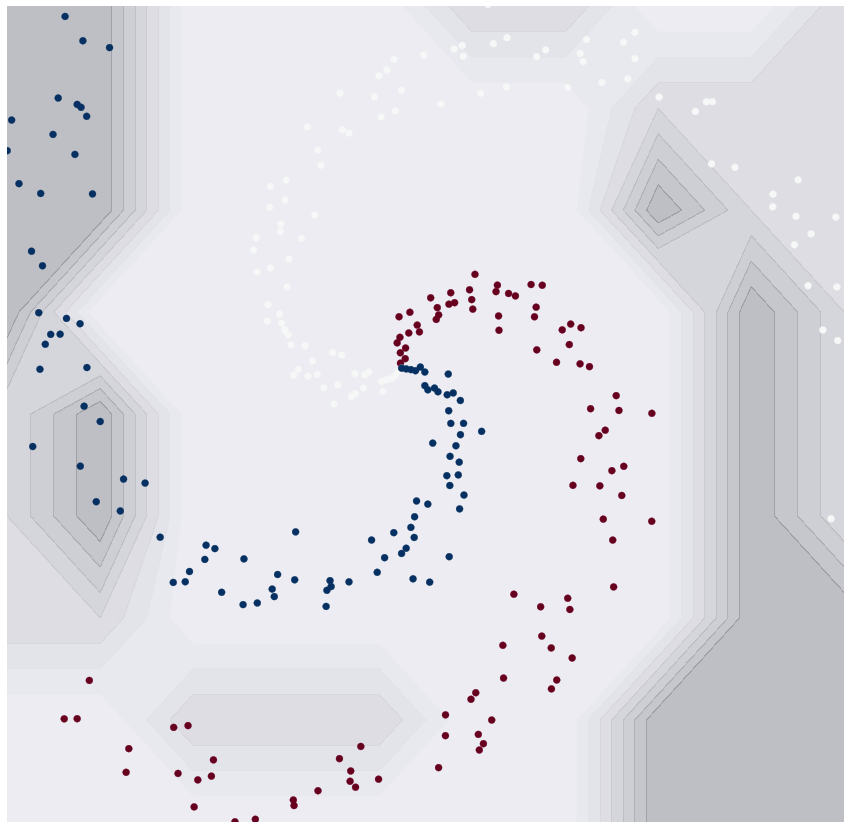

In [42]:
degree = 10

def svm_polynomial_kernel(degree=degree):

    clf = svm.SVC(degree=degree, kernel='poly')
    clf.fit(train.iloc[:,1:3], train.Label)

    plt.figure(figsize=(15,15))

    # create a mesh to plot in
    x_min, x_max = train.iloc[:, 1].min(), train.iloc[:, 1].max()
    y_min, y_max = train.iloc[:, 2].min(), train.iloc[:, 2].max()
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.2), np.arange(y_min, y_max, 0.2))


    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, x_max]x[y_min, y_max].
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])  # np.c_ is lide pd.concat(axis=1)

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, alpha=0.2)

    # Plot also the training points
    plt.scatter(train.iloc[:, 1], train.iloc[:, 2], c=train.Label, cmap=plt.cm.RdBu)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.xticks(())
    plt.yticks(())

    plt.show()
    
svm_polynomial_kernel(degree)


# Text Classification (ADVANCED)

We are going to apply SVM to a real scenario.
Regarding the polarity classification task that we normally address in the Naïve Bayes Practice, Let us see if the fancier SVM model can outperform our first naïve approach.

To facilitate the exercise, the following code prepare the movie-pang dataset for the application of SVM.

In [65]:
dataset = pd.read_csv("movie-pang02.csv")

# Randomize the dataset to facilitate the training process
dataset = dataset.sample(frac=1).reset_index(drop=True)

from sklearn.feature_extraction.text import CountVectorizer
count_vect = CountVectorizer()
dataset_counts = count_vect.fit_transform(dataset.text)

X_train, X_test, y_train, y_test = train_test_split(dataset_counts, dataset['class'], test_size=0.2, random_state=42)

Train an SVM classifier, plot the confusion matrix and evaluate it in terms of accuracy.

**Note**: It is recommended to use the `rbf` kernel which is specially suited for text classification. Take a look to this kernel, its hyperparameters and their configuration: https://scikit-learn.org/stable/auto_examples/svm/plot_rbf_parameters.html#sphx-glr-auto-examples-svm-plot-rbf-parameters-py

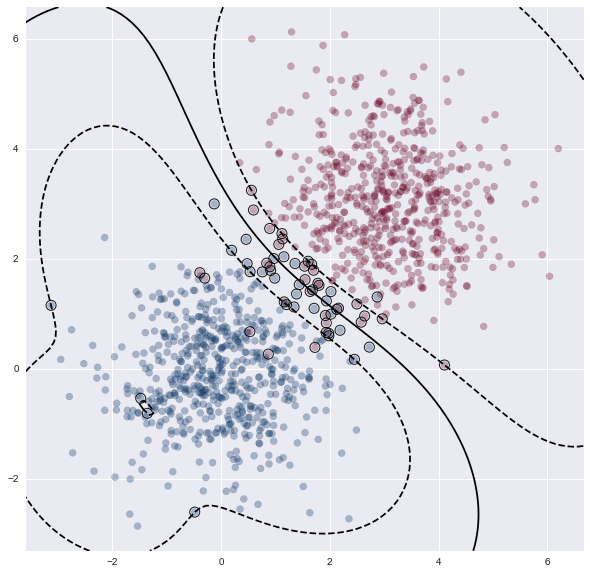

[30 32]


In [89]:
# Your code here
C = 10
gamma= 0.1

rbf_svc = svm.SVC(kernel='rbf', C=C, gamma=gamma)
rbf_svc.fit(X_train, y_train)

def plot_svm_decision(X_train, y_train, rbf_svc):
    
    fig, ax = plt.subplots(figsize=(10, 10))
    
    # plot the training data
    ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train[:,0], cmap=plt.cm.RdBu, alpha=0.3)
    
    # plot the decision function
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()

    # create grid to evaluate model
    xx = np.linspace(xlim[0], xlim[1], 100)  # 30 points between xlim[0] and xlim[1]
    yy = np.linspace(ylim[0], ylim[1], 100)
    YY, XX = np.meshgrid(yy, xx)
    xy = np.vstack([XX.ravel(), YY.ravel()]).T
    Z = rbf_svc.decision_function(xy).reshape(XX.shape)

    # plot decision boundary and margins
    ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1],
               linestyles=['--', '-', '--'])
    
    # plot support vectors
    # this function not only plots the observations on which the margins lie, 
    # but also all those observations that fall outside their class' region:
    ax.scatter(rbf_svc.support_vectors_[:, 0], rbf_svc.support_vectors_[:, 1], s=100,
               linewidth=1, facecolors='none', edgecolors='k', alpha=0.9)
    plt.show()
    
plot_svm_decision(X_train, y_train, rbf_svc)
print(rbf_svc.n_support_)

Accuracy = 0.98


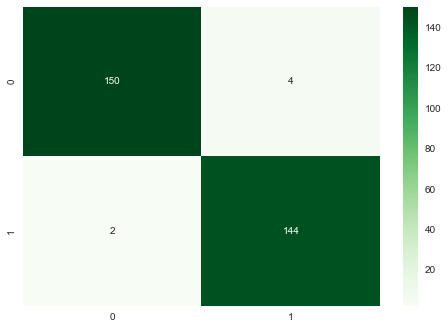

In [90]:
predictions = rbf_svc.predict(X_test)

print("Accuracy = {}".format(accuracy_score(y_test, predictions)))
cm = confusion_matrix(y_test, predictions, labels=[0,1])
sns.heatmap(cm, annot=True, fmt="g", cmap=plt.cm.Greens)